**Talluri Harshitha**

Task 03 : Create a k-Means Clustering Algorithm to group Customers of a retial store based on their purchase history

Dataset Used:
https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset (assuming it is in CSV format)
data = pd.read_csv("Mall_Customers.csv")
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

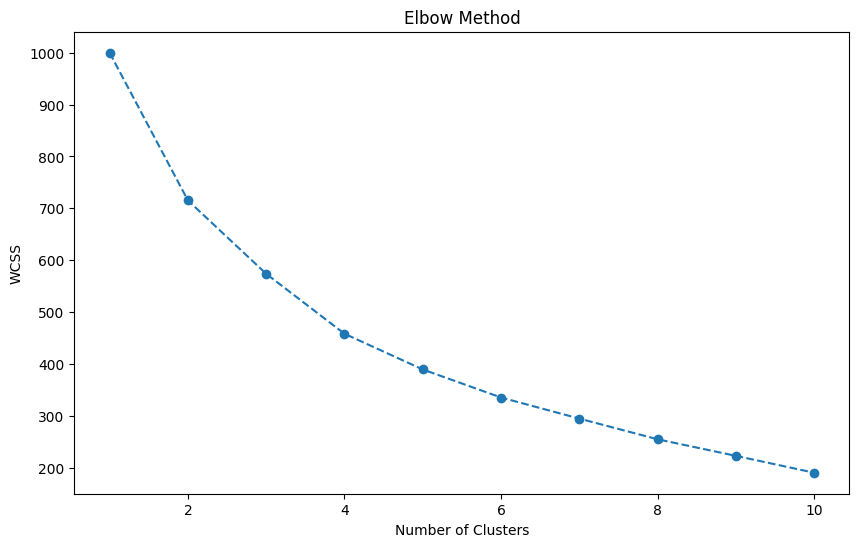

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'data' is your DataFrame containing the customer purchase history
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])

# 'Male' will be encoded as 1 and 'Female' as 0
# If 'Female' needs to be encoded as 1 and 'Male' as 0, use label_encoder.inverse_transform() to reverse the encoding


# Preprocessing: standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Determine the optimal number of clusters using the elbow method
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

For k=1

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



Clustered Data:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1       1   19                  15                      39   
1           2       1   21                  15                      81   
2           3       0   20                  16                       6   
3           4       0   23                  16                      77   
4           5       0   31                  17                      40   

   Cluster_1  Cluster_2  Cluster_3  Cluster_4  Cluster_5  Cluster  
0          0          0          1          2          4        0  
1          0          0          1          2          4        0  
2          0          0          1          2          4        0  
3          0          0          1          2          4        0  
4          0          0          1          2          4        0  


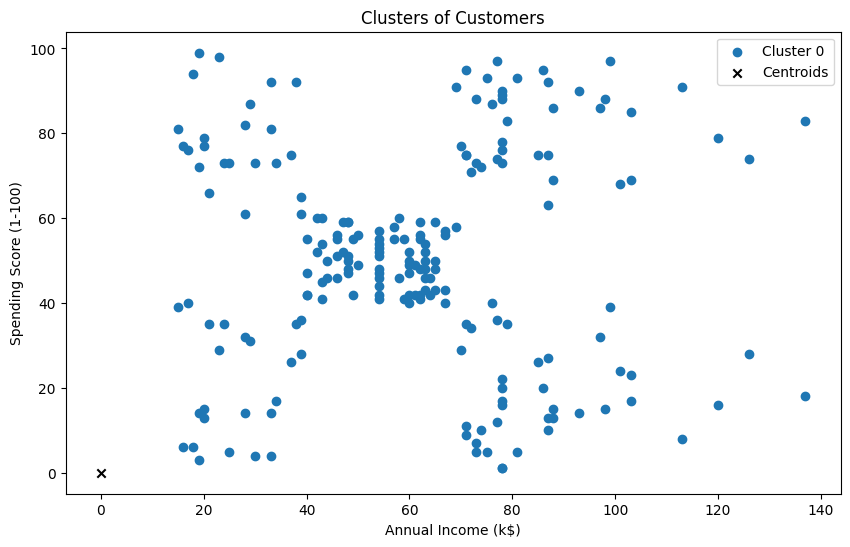

In [ ]:
# Choose the optimal number of clusters (e.g., from the elbow curve)
k = 1

# Apply K-means clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to the original dataset
data['Cluster'] = clusters

# Display the clustered data
print("\nClustered Data:")
print(data.head())

# Visualize the clusters (assuming 2D data for simplicity)
plt.figure(figsize=(10, 6))
for cluster_label in range(k):
    plt.scatter(data[data['Cluster'] == cluster_label]['Annual Income (k$)'],
                data[data['Cluster'] == cluster_label]['Spending Score (1-100)'],
                label=f'Cluster {cluster_label}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='black', marker='x', label='Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


For k=2

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



Clustered Data:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1       1   19                  15                      39   
1           2       1   21                  15                      81   
2           3       0   20                  16                       6   
3           4       0   23                  16                      77   
4           5       0   31                  17                      40   

   Cluster_1  Cluster_2  Cluster_3  Cluster_4  Cluster_5  Cluster  
0          0          0          1          2          4        0  
1          0          0          1          2          4        0  
2          0          0          1          2          4        0  
3          0          0          1          2          4        0  
4          0          0          1          2          4        0  


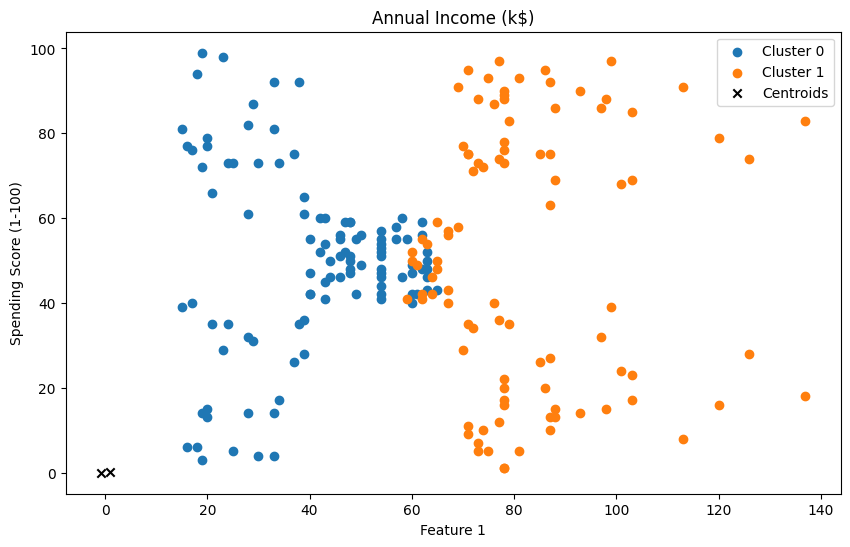

In [ ]:
# Choose the optimal number of clusters (e.g., from the elbow curve)
k = 2

# Apply K-means clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to the original dataset
data['Cluster'] = clusters

# Display the clustered data
print("\nClustered Data:")
print(data.head())

# Visualize the clusters (assuming 2D data for simplicity)
plt.figure(figsize=(10, 6))
for cluster_label in range(k):
    plt.scatter(data[data['Cluster'] == cluster_label]['Annual Income (k$)'],
                data[data['Cluster'] == cluster_label]['Spending Score (1-100)'],
                label=f'Cluster {cluster_label}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='black', marker='x', label='Centroids')
plt.title('Annual Income (k$)')
plt.xlabel('Feature 1')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



Clustered Data:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1       1   19                  15                      39   
1           2       1   21                  15                      81   
2           3       0   20                  16                       6   
3           4       0   23                  16                      77   
4           5       0   31                  17                      40   

   Cluster_1  Cluster_2  Cluster_3  Cluster_4  Cluster_5  Cluster  
0          0          0          1          2          4        1  
1          0          0          1          2          4        1  
2          0          0          1          2          4        1  
3          0          0          1          2          4        1  
4          0          0          1          2          4        1  


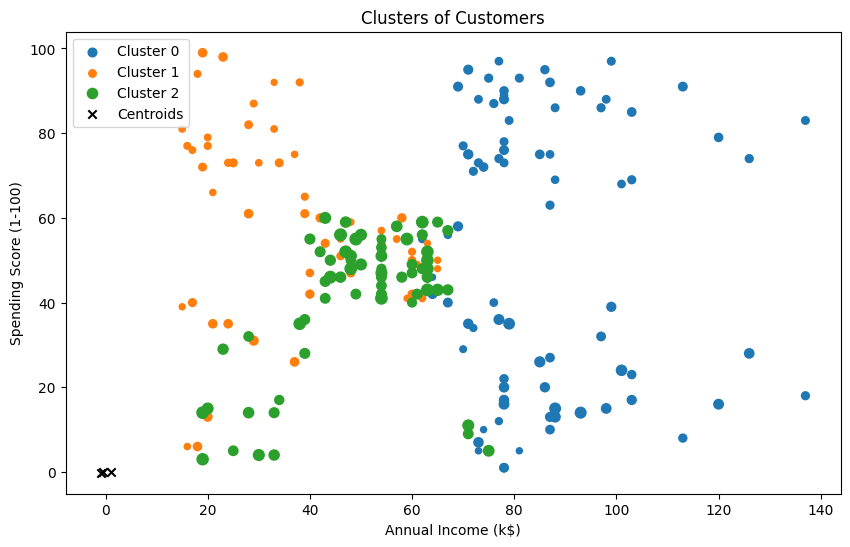

In [ ]:
# Choose the optimal number of clusters (e.g., from the elbow curve)
k = 3

# Apply K-means clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to the original dataset
data['Cluster'] = clusters

# Display the clustered data
print("\nClustered Data:")
print(data.head())

# Visualize the clusters (assuming 2D data for simplicity)
plt.figure(figsize=(10, 6))
for cluster_label in range(k):
    plt.scatter(data[data['Cluster'] == cluster_label]['Annual Income (k$)'],
                data[data['Cluster'] == cluster_label]['Spending Score (1-100)'],
                 data[data['Cluster'] == cluster_label]['Age'],
                label=f'Cluster {cluster_label}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='black', marker='x', label='Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
